Exercises on pages 216-217.

**Which Linear Regression training algorithm can be used on a training set that has millions of features?**

An iterative method is needed to train a Linear Regression model on a dataset with millions of features.  This is because the closed-form solution to the OLS problem involves computing the Moooe-Penrose pseudoinverse of the training matrix, $(\pmb{X}^{\intercal}\pmb{X})^{-1}\pmb{X}^{\intercal}\pmb{y}$, which is very computationally inefficient.  Interative methods such a Gradient Descent are more computationally efficient and are guaranteed (under some assumptions) to converge to the global optimum.

**Suppose the features in your traning set have very different scales.  Which algorithms might suffer from this, and how?  What can be done to mitigate this effect?**

Any machine learning algorithm that makes comparisons between features on the basis of within-feature Euclidean distance implicitly makes the assumption that the scale on which every feature is measured is the same.  Violating this assumption can lead to undersired results, because those features that are measured on larger scales as affected differently from features measured on smaller scales.  This unequal treatment of the features is almost never desired.

For example, when regularizing a Linear Regression model by penalizing some norm of the weights matrix, features measured on a larger scale will be "penalized" more than those measured on a smaller scale, leading to the large-scale features to be more drastically reduced towards zero.  This is undesired because typically the goal of using a regularized model is to reduce the weights of features that do not contribute meaninfgully to the predictive power of the model, regardless of the scale on which the features are measured.

Algorithms that can suffer from this effect without a data preprocessing step include Ridge Regression, LASSO, and the Elastic Net.  Each one of these models contains a penalty term that penalizes large weights, and thus each model implicitly makes the assumption that all of the features are measured on the same scale.

To preprocess the data to fit the regularization assumption, scaling the features is needed. This will guarantee that the features are measured on the same scale, i.e. with a mean of 0 and a standard deviation of 1.  If $\mu$ is the mean of feature vector $\pmb{x}$ and $\sigma$ is its standard deviation, then the preprocessed feature vector $\tilde{\pmb{x}}$ is given by: $$ \tilde{\pmb{x}} = \frac{\pmb{x} - \mu}{\sigma} $$.

`scikit-learn` implements a `StandardScaler` class that can be used to perform this scaling on all features of an input matrix `X` by calling `X_scaled = StandardScaler().fit_transform(X)`.

A nuance of model evaluation that is sometimes forgotten is the need to scale any validation by using the same learned parameters (i.e. $\mu$ and $\sigma$ for each sclaed feature), and **not** to learn a new set of parameters to scale the validaiton data. Failure to do so is data leakage: data used to validate the model must be assumed to come from the training data's distribution, and thus must be preprocessed using the parameters learned from the training data.

**Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?**

Gradient Descent does not run the risk of getting stuck in a local minimum when fitting a Logistic Regression model because the Logistic Regression's loss function is convex.  The convexity of the loss function guarantees that any local minimum is also a global minimum.

The loss function used is the negative log likelihood:
$$ J(\pmb{\theta}) = -\sum^{m}_{i=1}y_i\log\hat{p}_i + (1 - y_i)\log(1-\hat{p}_i) $$
where
$$ \hat{p_i} = \mathbb{P}(y_i = 1|\pmb{\theta}) = \frac{1}{1 + e^{-\pmb{\theta}^{\intercal}\pmb{x}_i}} $$

A function $f$ is convex iff: $$ \forall a, b \in \mathbb{R}, 0\leq \rho \leq 1, f((1-\rho)a + \rho b) \geq (1-\rho)f(a) + \rho f(b) $$

The convexity of the negative log likelihood can be proven by noting that $J\pmb(\theta)$ can be rewritten:
$$ J(\pmb{\theta}) = -\sum^{m}_{i=1} y_i\pmb{\theta}^{\intercal}\pmb{x}_i - \log(1 + e^{\pmb{\theta}^{\intercal}\pmb{x}_i}) $$

and noting that the two terms are both themselves convex functions.  Since the sum of convex functions is itself also convex, the negative log likelihood is convex.

Although any local minimum of the loss function is guaranteed to also be a global minimum, it is _not_ guaranteed to be unique.  This situation can arise in fitting a Logistic Regression model when the two classes are linearly separable.  In this situation, a Logistic Regression model may not be stable; this can be addressed by using another model such as Linear Discriminant Analysis.

When using Gradient Descent, the learning rate must be set small enough, or must decay to a small value, to ensure that the algorithm does converge to approximately the global minimum.

**Do all Gradient Descent algorithms lead to the same model, provided that you run them long enough?**

No, models trained with Gradient Descent will not all necessarily converge to the same model, even if the loss function is convex.  The convergence of the Gradent Descent algorithm is affected by the Learning Rate, a parameter that determines the size of the update when using the gradient to update the parameter weights.  If the Learning Rate is too high, the algorithm can repeatedly "jump across" the loss function's minimum and fail to converge to a desired model.  Some solutions to this problem include setting the Learning Rate to a low-enough value so that the parameter updates can approach the function's minimum, and decaying the learning rate so that fast progress can be made in the early stages of the algorithm, with finer updates toward the end of the algorithm.

**Suppose you use Batch Gradient Desecent and then plot the validation error at every epoch.  If you notice that the validation error consistently increases, what is the likely cause?  How can you fix this?**

Increasing validation error is a sign of the model overfitting.  The model's ability to fit the training data gets better at the expense of its ability to generalize well to new data, leading to increasing validation error when testing the model against data that was not used for training.

There are many ways to prevent overfitting, many of which depend on the exact model that is being used.  One universal way to reduce the risk of overfitting is to use a larger training set, if possible.  Regularization is a technique that adds a term to  the model's loss function that penalizes more complex models, inducing the model to add complexity only where necessary.  Regularization can be used with linear models or Support Vector machines by adding a penalty term that penalizes large fitted parameter values.  Another way to reduce the risk of overfitting by using a less flexible model is to reduce the number of features used, specifically to discard features that contribute more noise than signal to predictions.  an example of this would be preferring a Linear Regression model over a more flexible Polynomial Regression model.  This reduces the risk of overfitting by trading off a higher model bias for lower model variance.  When working with neural networks, dropping some of the weights during each training epoch prevents the model from becoming too dependent on a small set of parameters.

**Is it a good idea to stop Mini-Batch Gradient Descent immediately upon the validation error increasing?**

Stopping Mini-Batch gradient Descent immediately when the validation error increases over the previous epoch is too naive of a stopping rule.  The rationale for such an approach is presumably to stop training when the model's generalization ability degrades, and a sustained increase in validation error is a reliable sign that this is happening.  However, an epoch-over-epoch increase in validation error can be due to factors other than overfitting.  For example, the gradient calculated using the mini-batch is noisier than it would be if the gradient were computed against the entire training set.  This noise can cause the Gradient Descent algorithm to update the paramteres weights in such a way that, when trained on a new mini-batch of data, results in slightly higher validation error.  This effect has nothing to do with the generalization ability of the model and everything to do with the noisy parameter update.  Other factors unrelated to generalization ability could cause a temporary increase in validation error, such as a learning rate that is set too high to make effective parameter updates.

A better stopping criterion is to wait until the model has seen a sustained degradation of its generalization ability, i.e. a steady rise in the validation error.

**Which Gradient Descent algorithm (among those discussed in the chapter) will reach the vicinity of the optimal solution the fastest?  Which will actually converge?  How can you make others converge as well?**

The chapter presents three variations of the Gradient Descent algorithm.  The first, (regular) Gradient Descent, calculates the gradient of the parameter vector using the entire training data set.  While this yields the most accurate information about the cost function's "landscape," it is costly to compute, espectially if the training set is large.  The second, Stochasti Gradient Descent, calculates the gradient at each epoch with respect to only one randomly chosen training data point.  This is much faster to compute but comes with the drawback that the path taken towards the cost function's minimum is more stochastic, which can mean that the algorithm takes a long time to converge.  The third, Mini-Batch Gradient Descent, represents a compromise between the two extremes: the gradient is computed using a small, randomly-chosen batch of training data points, which yields more accurate gradient information than Stochastic Gradient Descent but is cheaper to compute than using the full dataset.  Mini-Batch Gradient Descent will thus converge faster than Stochastic Gradient Descent.

The learning rate hyperparameter plays an important role in a the speed of convergence.  A too-large learning rate will cause the parameter update steps to miss local minima, and may not converge.  A too-small learning rate will more reliably converge, but it can take a long time because more update steps are necessary to reach the minimum.  One way to improve convergence is to decay the learning rate so that, early on in the training, the model is allowed to quickly get closer to the cost function's minimum, while later in the training, the learning rate is small enough to ensure that the model does converge.

**Suppose you are using Polynomial Regression. You plot the learning curves and notice that there is a large gap between the training error and the validation error.  What is happening?  What are three ways to solve this problem?**

A large gap between the training and validation error is an indication that the model is not generalizing well, i.e. that it is overfitting.  The issue of overfitting can be dealt with by using a less flexible model.  In the case of Polynomial Regression, this can be accomplished by adding a regularization term to constrain the model, lowering the degree of polynomial features that re used, thereby reducing the number of features, or by performing feature selection to reduce the number of features before constructing higher-order features.

**Suppose you are using Ridge Regression and you notice that the training and validations errors are both similar and consistently high.  Is the model suffering from bias or variance?  Should you increase the regularization parameter $\alpha$, or reduce it?**

If training and validation loss are similarly high, the model is likely suffering from high bias.  Similar terms are underfitting or a less flexible model than needed.  The assumptions of the model are too restrictive to allow the model to fit the data, so more flexibility is required.  One simple way to increase the flexibility or a regularized model is to decrease the regularization penalty for large weights; this corresponds to using a lower value of $\alpha$ to better enable the model to fit the data.

**Why would one use...**

- **...Ridge Regression (i.e. as opposed to non-regularized Linear Regression)?**

Ridge Regression is a regularized model, while "normal" Linear Regression is unregularized.  This makes Ridge Regression a less flexible model than unregularized Linear Regression.  Thus, Ridge Regression is a better option when it is necessary to prevent the model from overfitting.

- **...LASSO instead of Ridge Regression?**

LASSS+O imposes a different penatly on the linear model than Ridge Regression; LASSO penalizes the model by the $\ell_1$ norm while Ridge Regression penalizes it by the $\ell_2$ norm.  This has the effect of a LASSO model often setting some of the weights to exactly zero where Ridge Regression will typically set weights close to, but not exactly zero.  This can make LASSO useful in a situation that requires feature selection, as this property can be used as one strategy to automatically performing feature selection.

- **...Elastic Net instead of LASSO?**

Elastic Net represents a continuous tradeoff between LASSO and Ridge Regression.  As such, it is a more flexible model, and thus may be able to fit a certain dataset better.  Elastic Net would likely beat out LASSO if the data includes many highly correlated features: LASSO would reduce almost all of the associated weights to exactly 0, while Elastic Net would keep small nonzero values for the weights, which may be better from a generalization perspective.

**Suppose you want to classify pictures as either outdoor or indoor, and either daytime or nighttime.  Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?**

This problem must be formulated as two independent binary classifications.  Thus, two Logistic Regressions must be used, not one Softmax Regression.  Logistic Regression is a binary classifier, and using two of these models independently of each other allows for predictions to be made (independently) abount indoor/outdoor and nighttime/daytime.  Softmax Regression by contrast is a tool to be ujsed in multiclass classification, where together the possible prediction classes are mutually exclusive and each training point must be assignedd to exactly one of the classes.

**Implement Batch Gradient Descent with early stopping for Softmax Regression, without resorting to `sklearn`.**

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()

In [7]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [21]:
learning_rate = 0.01
n_iterations = 2000
early_stopping = True
batch_size = 50

n = X.shape[0]
p = X.shape[1]
K = len(set(y))

theta = np.random.randn(p, K)

losses = []
for i in range(n_iterations):
    batch_ix = np.random.choice(n, batch_size, replace=False)
    X_batch = X[batch_ix]
    y_batch = y[batch_ix]
    
    # Rows are points
    # columns are classes
    # Need to check if this implementation of the gradient function is correct.
    denom = np.exp(X_batch.dot(theta)).sum(axis=1).reshape(-1, 1)
    probabilities = np.exp(X_batch.dot(theta)) / denom
    predictions = np.argmax(probabilities, axis=1)
    
    # Fancy indexing
    # Inspired by: https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-1-hot-encoded-numpy-array
    onehot = np.zeros((y_batch.size, K))
    onehot[np.arange(y_batch.size), y_batch] = 1
    
    loss = probabilities - onehot
    losses.append(loss.sum())
    gradient = 1/n * loss.T.dot(X_batch).T
    update = gradient * learning_rate
    theta += update

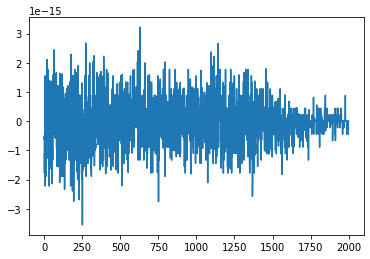

In [22]:
plt.plot(range(len(losses)), losses);

In [96]:
# Rows are points
# columns are classes

denom = np.exp(X_batch.dot(theta)).sum(axis=1).reshape(-1, 1)
probabilities = np.exp(X_batch.dot(theta)) / denom
predictions = np.argmax(probabilities, axis=1)

In [105]:
probabilities

array([[5.65204312e-01, 1.52565547e-06, 4.34794162e-01],
       [6.72893260e-01, 2.89992154e-05, 3.27077741e-01],
       [5.69818564e-01, 3.96565029e-02, 3.90524933e-01],
       [5.61959583e-01, 3.22805087e-02, 4.05759909e-01]])

In [97]:
# Fancy indexing
# Inspired by: https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-1-hot-encoded-numpy-array

onehot = np.zeros((y_batch.size, y_batch.max()+1))
onehot[np.arange(y_batch.size), y_batch] = 1

In [111]:
loss = onehot - probabilities
gradient = loss.T.dot(X_batch).T

In [113]:
update = gradient * learning_rate
theta += update

Solutions on page 952.